In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
df= pd.read_csv('../input/20112018-salaries-for-san-francisco/Total.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [4]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [5]:
print('This Dataset countains {} Rows and {} Columns'.format(df.shape[0], df.shape[1]))

This Dataset countains 312882 Rows and 9 Columns


In [6]:
### we must their type to float64 

series_list = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for series in series_list:
    df[series] = pd.to_numeric(df[series], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [8]:
df[['BasePay','TotalPay','Benefits','OvertimePay','OtherPay','TotalPayBenefits']].describe()

,BasePay,TotalPay,Benefits,OvertimePay,OtherPay,TotalPayBenefits
count,312276.000000,312882.000000,276722.000000,312881.000000,312881.000000,312882.000000
mean,69808.257496,78802.645788,25016.917292,5668.929393,3460.694974,100928.339777
std,45376.929428,53230.758542,15089.077103,12745.655309,7387.263120,66485.186495
min,-474.400000,-618.130000,-13939.420000,-292.800000,-7058.590000,-3628.780000
25%,35722.365000,38803.000000,12729.762500,0.000000,0.000000,48955.072500
50%,67710.450000,74908.790000,28327.330000,0.000000,728.000000,100011.290000
75%,99312.302500,111386.897500,35268.162500,5223.120000,3958.680000,142376.300000
max,592394.340000,592394.340000,125891.730000,309481.030000,400184.250000,712802.360000


In [9]:
A=df['Year'].nunique()
B=df['Year'].unique()
'The information of {} years are available in the dataset:{}'.format(A,B)

'The information of 8 years are available in the dataset:[2011 2012 2013 2014 2015 2016 2017 2018]'

In [10]:
df.groupby('Year').mean()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Year,,,,,,
2011,63595.956517,4531.065429,3617.081926,NaN,71744.103871,71744.103871
2012,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232
2013,69630.030216,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714
2014,66564.421924,5401.993737,3505.421251,24789.601756,75471.836912,100261.438668
2015,68776.293324,5606.934061,3125.042178,24217.640375,77508.269562,101725.909937
2016,71181.405996,6136.422376,3197.303205,24068.862102,80513.166356,104581.440982
2017,74570.581134,6325.774603,3338.290051,25434.816408,84234.645789,109669.462197
2018,76947.426822,6746.790232,3487.691270,26292.455190,87181.908324,113474.363514


<AxesSubplot:xlabel='TotalPay', ylabel='Density'>

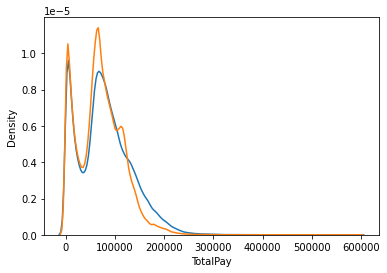

In [11]:


sns.kdeplot(df['TotalPay'])
sns.kdeplot(df['BasePay'])


<AxesSubplot:xlabel='Year', ylabel='TotalPay'>

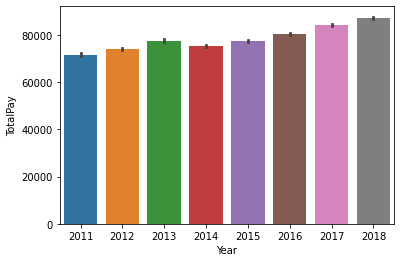

In [12]:
sns.barplot(data=df, x='Year', y='TotalPay')

In [13]:
df.groupby('Year').nunique()['JobTitle']

Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1009
2017    1017
2018    1000
Name: JobTitle, dtype: int64